In [1]:
import pathlib
import os
import sys

PACKAGE_PARENT = pathlib.Path.cwd().parent 
SCR_DIR = os.path.join(PACKAGE_PARENT, 'src')
sys.path.append(SCR_DIR)

from config.loc_config import TRAIN_DATA_LOC, TEST_DATA_LOC, PRED_DATA_LOC, ANNOT_LOC
from preprocessing.utils import build_annotation_csv, check_annot_dataframe, transform_bilinear
from model.dataset import IntelDataset

In [2]:
train_df = build_annotation_csv(image_location=TRAIN_DATA_LOC, annot_location=ANNOT_LOC, output_csv_name='train.csv')
test_df = build_annotation_csv(image_location=TEST_DATA_LOC, annot_location=ANNOT_LOC, output_csv_name='test.csv')

In [3]:
class_names = list(train_df['class_name'].unique())

In [4]:
print(check_annot_dataframe(train_df))
print(check_annot_dataframe(test_df))

[(4, 'sea'), (0, 'buildings'), (2, 'glacier'), (3, 'mountain'), (5, 'street'), (1, 'forest')]
[(4, 'sea'), (0, 'buildings'), (2, 'glacier'), (3, 'mountain'), (5, 'street'), (1, 'forest')]


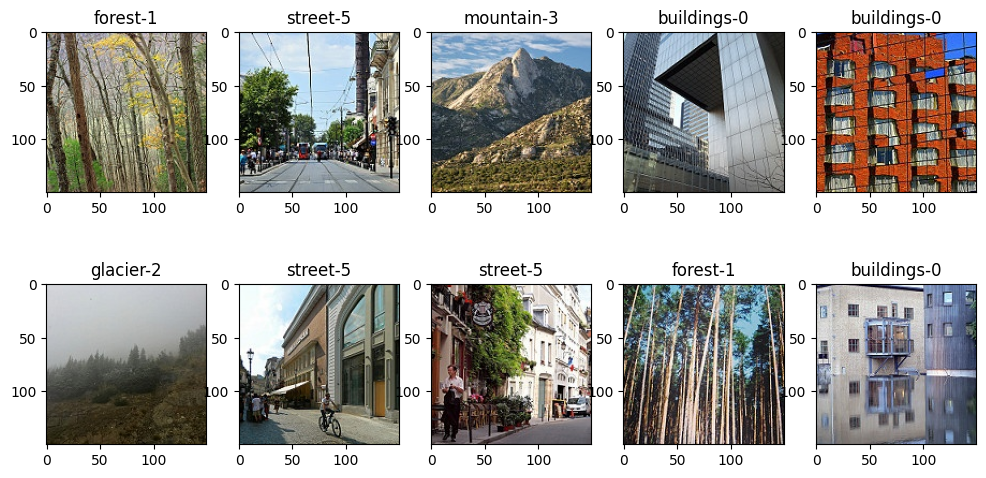

In [5]:
train_dataset_untransformed = IntelDataset(annot_df = train_df, transform=None)
train_dataset_untransformed.visualize()
#visualize 10 random images from the loaded dataset


In [6]:
image_transform = transform_bilinear(224, 224)
train_dataset = IntelDataset(annot_df = train_df, transform=image_transform)
test_dataset = IntelDataset(annot_df = test_df, transform=image_transform)


c:\Users\phuon\OneDrive\Documents\GitHub\intel_img_clf_pytorch\venv39\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

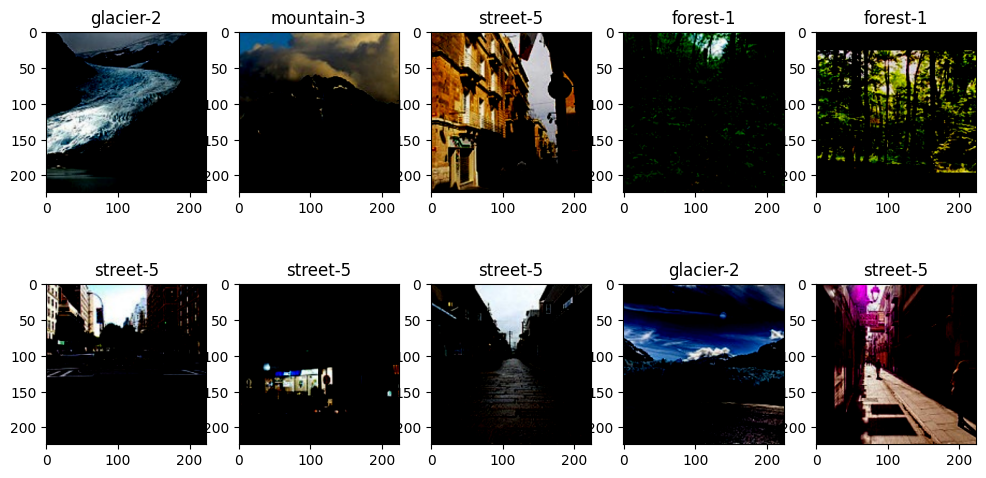

In [7]:
train_dataset.visualize()